In [1]:
import os
from PIL import Image
import torchvision.transforms as transforms
import torch
import matplotlib.pyplot as plt
import pandas as pd
import albumentations as A
from albumentations.pytorch import ToTensorV2
import numpy as np

In [2]:
df = pd.read_csv('./data/train.csv')

In [3]:
img_path = os.path.join('./data/train', '4fd4d1f693c164e6.jpg')
img_path = os.path.join('./data/train', 'df5de038a077c34a.jpg')
img_path = os.path.join('./data/train', '02533d35fe935981.jpg')


image = Image.open(img_path).convert('RGB')

In [4]:
transform = A.Compose([
    # A.Resize(763, 763),
    A.ColorJitter(
    brightness=0, contrast=0, saturation=0, # 다른 효과는 끄고
    hue=0.5, # 색조(hue)만 최대치로 변경
    p=0.5 # 50% 확률로 적용
    ),
    A.HorizontalFlip(p=0.5),
    A.RandomRotate90(p=0.5),
    A.Rotate(limit=30, p=0.7),  # ±30도 자유 회전
    A.Rotate(
        limit=30, p=0.7,
        border_mode=0, value=(255,255,255)  # 흰색으로 채움
    ),
    A.RandomBrightnessContrast(p=0.5),  # 밝기/대비
    A.GaussNoise(var_limit=(10.0, 50.0), p=0.5),  # 가우시안 노이즈
    A.MotionBlur(blur_limit=5, p=0.3),  # 모션 블러
    A.GridDistortion(p=0.3),  # 종이 찌그러짐처럼
    A.OpticalDistortion(distort_limit=0.2, shift_limit=0.2, p=0.3),  # 광학 왜곡
    A.ISONoise(color_shift=(0.01, 0.05), intensity=(0.1, 0.5), p=0.3),  # ISO 노이즈(카메라 촬영 느낌)
    A.ImageCompression(quality_lower=30, quality_upper=70, p=0.3),  # JPEG 압축 아티팩트
    # A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    # ToTensorV2()
])

In [5]:
flip_transform = A.Rotate(limit=360, p=0.7)
transform = A.Compose([
    A.ISONoise(color_shift=(0.01, 0.07), intensity=(0.3, 0.8), p=0.7),
    A.ColorJitter(
        brightness=0, contrast=0, saturation=0, # 다른 효과는 끄고
        hue=0.5, # 색조(hue)만 최대치로 변경
        p=0.7# 50% 확률로 적용
        ),
    A.GaussianBlur(blur_limit=(3,7), p=0.5),
    A.Rotate(
        limit=360, p=0.7,
        border_mode=0, value=(255,255,255)  # 흰색으로 채움
    ),
])



In [6]:
from augraphy import AugraphyPipeline, Letterpress, VoronoiTessellation, Hollow
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# augmentation sequence
my_sequence = [
    VoronoiTessellation(
        num_cells_range=(2000,2000),
        mult_range=(50,80),
        seed=42,
        noise_type="random",
        background_value=(100,150),
        numba_jit=1,
        p=0.7
),
]
pipeline  = AugraphyPipeline(my_sequence)

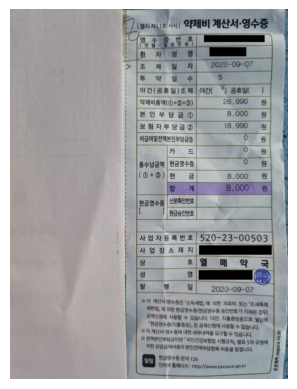

In [7]:
plt.imshow(image)
plt.axis("off")
plt.show()

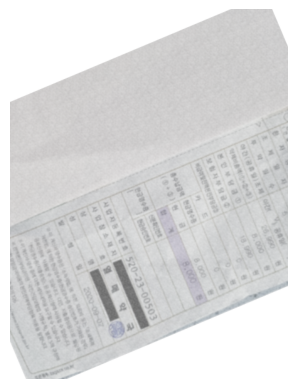

In [8]:
augmented_image = pipeline.augment(np.array(image))['output']
plt.imshow(transform(image=augmented_image)['image'])
plt.axis("off")
plt.show()

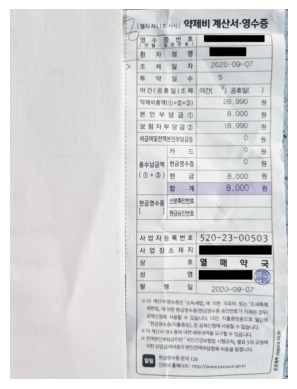

In [9]:
augmented_image = pipeline.augment(np.array(image))['output']
plt.imshow(augmented_image)
plt.axis("off")
plt.show()

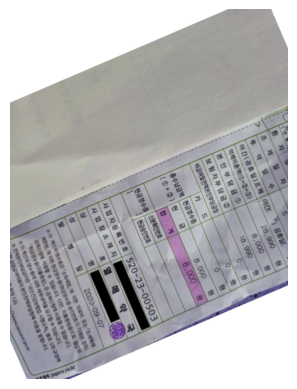

In [10]:
plt.imshow(np.array(transform(image=np.array(image))['image']))
plt.axis("off")
plt.show()

In [11]:
images = transform(image=np.array(image))['image']
mean = np.array([0.485, 0.456, 0.406])
std  = np.array([0.229, 0.224, 0.225])
img_numpy = images.permute(1, 2, 0).cpu().numpy()  # (HWC)
img_numpy = img_numpy * std + mean
img_numpy = np.clip(img_numpy, 0, 1)

plt.imshow(img_numpy)
plt.axis("off")
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'permute'

In [137]:
import albumentations as A
from albumentations.pytorch import ToTensorV2

train_transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.Rotate(limit=30, p=0.7),
    A.GaussNoise(var_limit=(10.0, 50.0), p=0.5),
    A.Cutout(num_holes=4, max_h_size=50, max_w_size=50, fill_value=0, p=0.5),
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.0, rotate_limit=0, p=0.5),
])

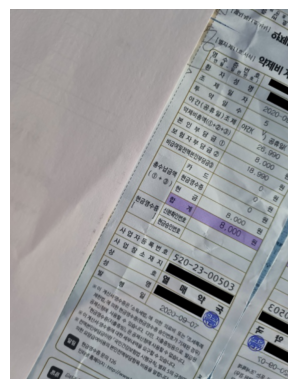

In [167]:
plt.imshow(np.array(train_transform(image=np.array(image))['image']))
plt.axis("off")
plt.show()